#### This notebook contain red wine dataset from kaggle
##### Wine Quality Prediction

In [40]:
#import libraries
import pandas as pd
import numpy as np
import pylab 
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline

In [41]:
#import dataset
data=pd.read_csv("winequality-red.csv")
df=data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
# checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### there are not any null values in dataset.

In [43]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Highest quality grade for wine is 8 and for lowest is 3. We can set wine quality value as low(for quality<=5) and high(quality>5). 

(12.3, -0.3)

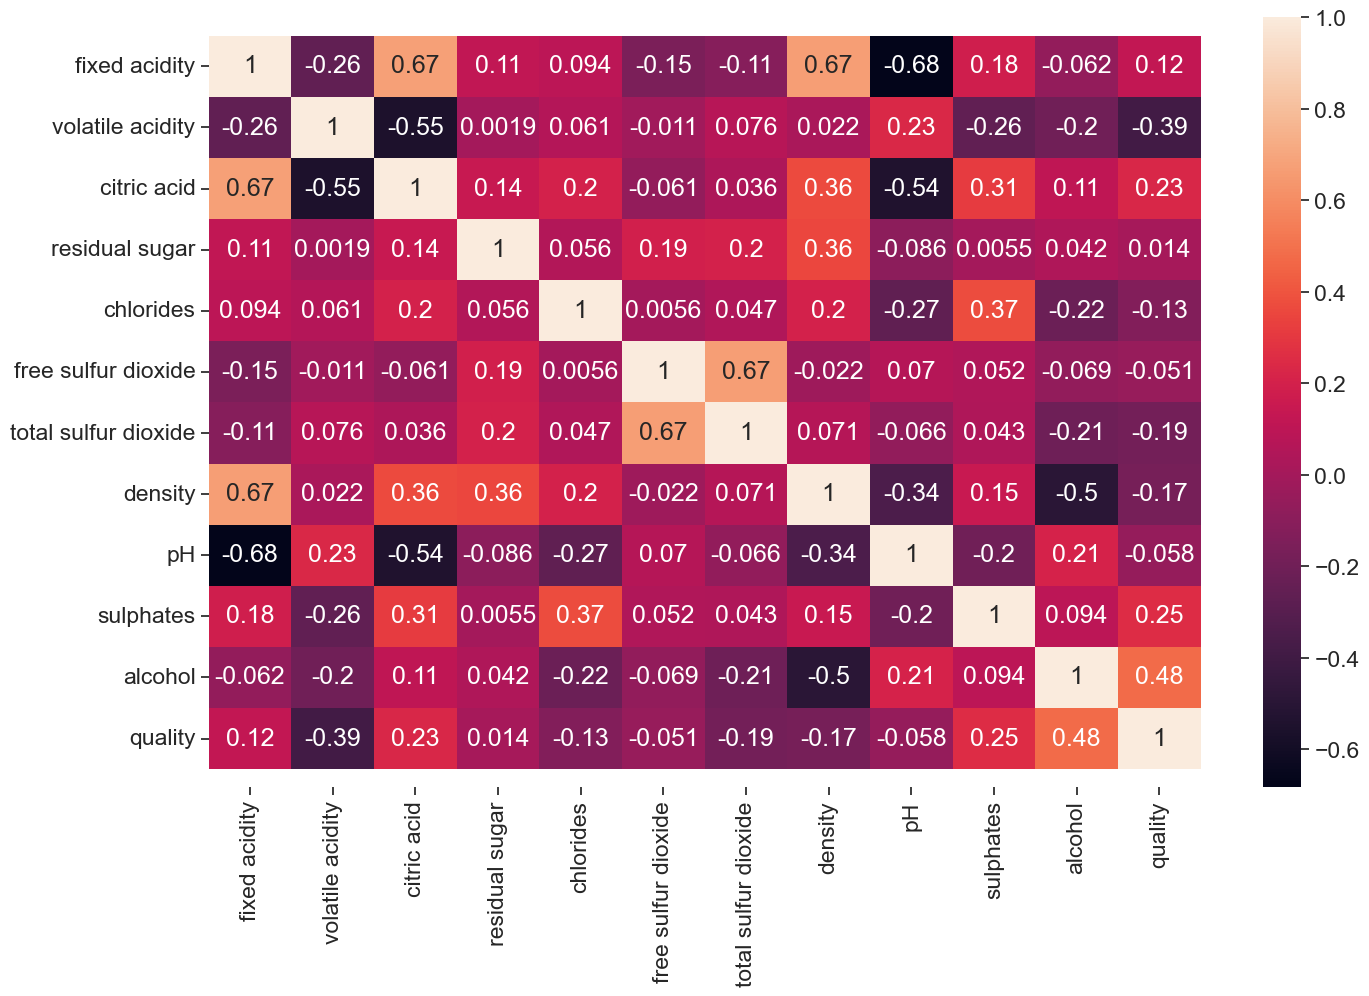

In [46]:
plt.figure(figsize = (16,10))

ax = sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.3, top - 0.3)

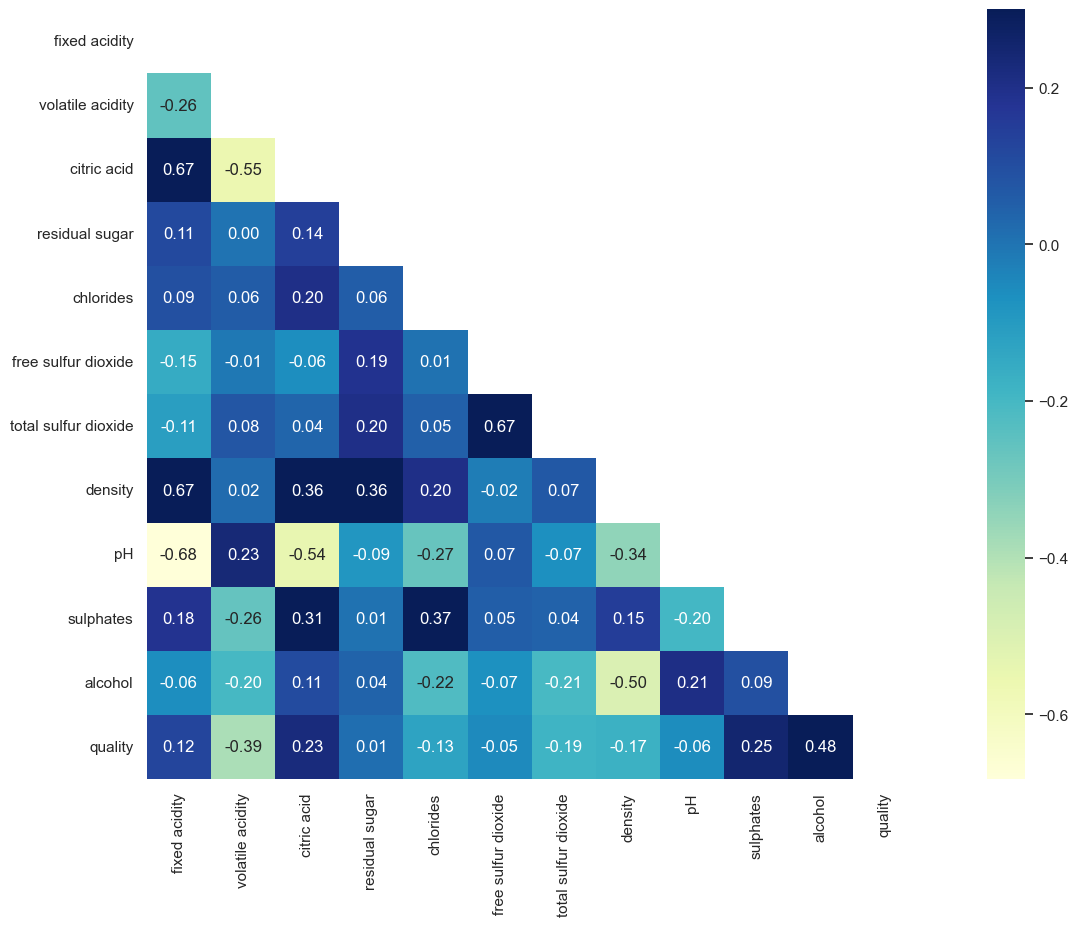

In [47]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.0,)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True,cmap="YlGnBu",fmt='.2f')

<Axes: xlabel='quality', ylabel='citric acid'>

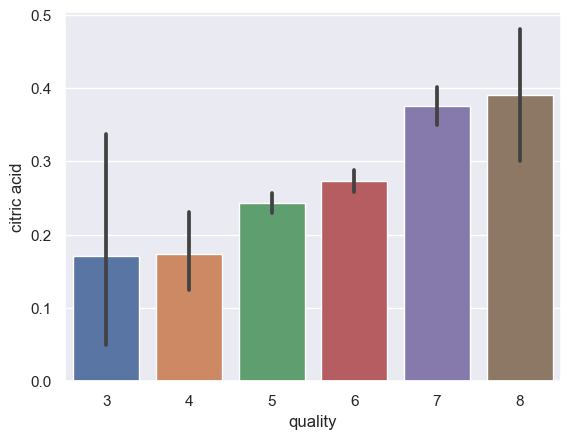

In [48]:
sns.barplot(x=df['quality'],
    y=df['citric acid'],
    data=df)

#### plotting different attribute vs wine quality to see their invidual effect on wine quality

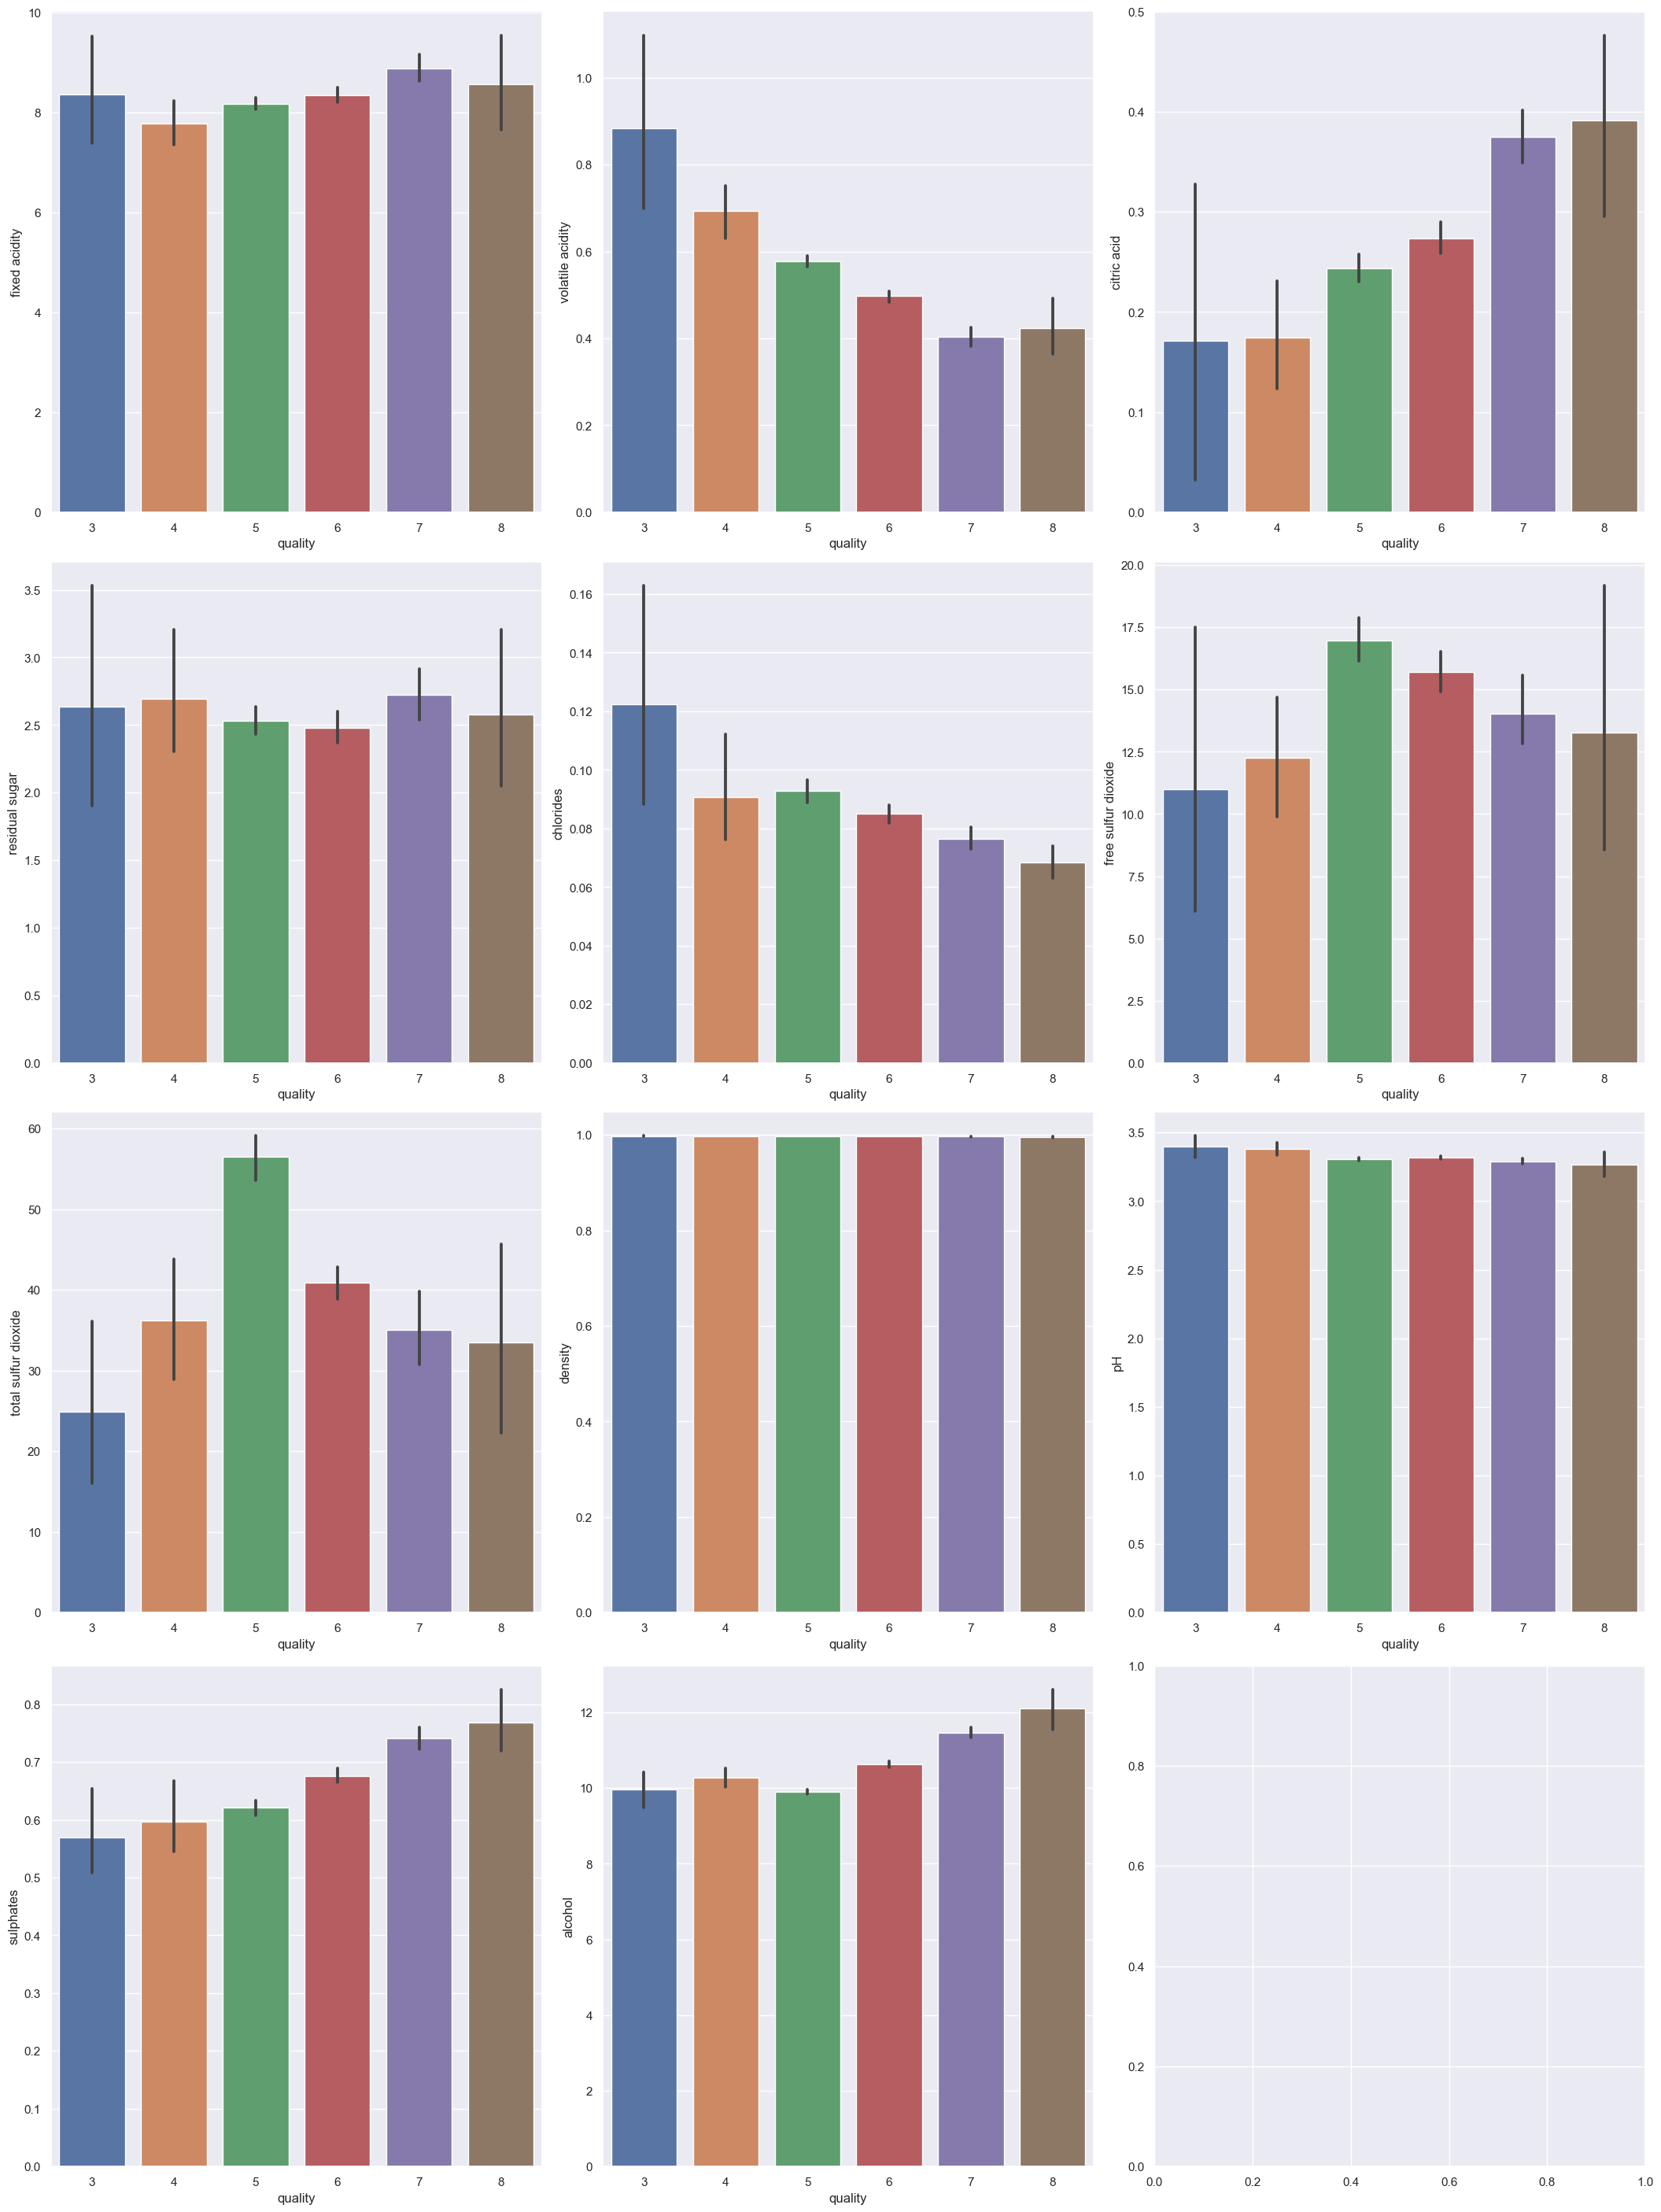

In [49]:
categorical_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates','alcohol']
num_plots = len(categorical_vars)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(y=var,x=df['quality'], data=df, ax=axs[row][pos])

#### we can conclude density and ph don't affect quality of wine in present dataset

#### quality: 
Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

#### quality_label:
This is a attribute we are going to derive from the quality attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium  high. Wines with a quality score of 5 or less than 5 are low quality, scores of 5<quality<=7 are medium quality and score>7 is high quality wines.

In [50]:
df['quality_label'] = df['quality'].apply(lambda x: 'high' if x >=8 else('medium' if x>5 else 'low'))


In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [52]:
df['quality_label'].value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

<Axes: >

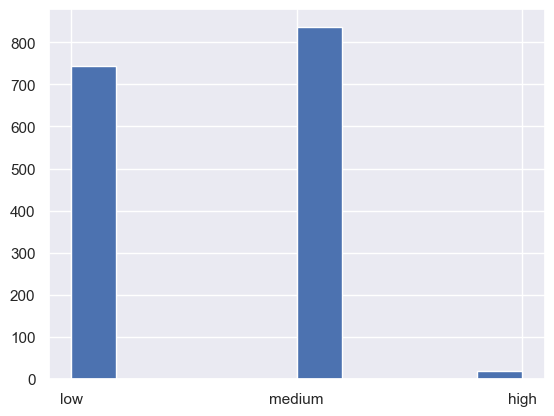

In [53]:
df['quality_label'].hist()

#### There is a imbalanced dataset in terms of quality_label. High quality wines are low in population.


#### Inferential Statistics
The general notion of inferential statistics is to draw inferences and propositions of a population using a data sample. The idea is to use statistical methods and models to draw statistical inferences from a given hypotheses. Each hypothesis consists of a null hypothesis and an alternative hypothesis. Based on statistical test results, if the result is statistically significant based on pre-set significance levels (e.g., if obtained p-value is less than 5% significance level), we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, if the results is not statistically significant, we conclude that our null hypothesis was correct.

A great statistical model to prove or disprove the difference in mean among subsets of data is to use the one-way ANOVA test. ANOVA stands for “analysis of variance,” which is a nifty statistical model and can be used to analyze statistically significant differences among means or averages of various groups. This is basically achieved using a statistical test that helps us determine whether or not the means of several groups are equal.

The alternative hypotheses, HA, tells us that there exists at least two group means that are statistically significantly different from each other. Usually the F-statistic and the associated p-value from it is used to determine the statistical significance. Typically a p-value less than 0.05 is taken to be a statistically significant result where we reject the null hypothesis in favor of the original.

So let's evaluate the hypotheses of each of our previous highlights through the statistical inference test.

In [54]:
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

In [55]:
def quality_inf_stat_test(feature):
    F, p = f_oneway(df[df.quality_label == 'low'][feature], 
                    df[df.quality_label == 'medium'][feature], 
                    df[df.quality_label == 'high'][feature])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    print('F Statistic: {:.2f}\t feature:{}\t p-value: {:.3f} \tNull Hypothesis: {}'.format(F,feature, p, msg))

In [56]:
print('ANOVA test across wine samples with different levels of quality:\n')
#- alcohol makes a lot of difference in quality. Although lower quality wines have the lowest standard deviation.
quality_inf_stat_test('alcohol')
#- The chlorides and volatile acidity are less present and presented smaller standard deviation in wines of higher quality.
quality_inf_stat_test('chlorides')
quality_inf_stat_test('volatile acidity')
#- The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase the quality.
quality_inf_stat_test('free sulfur dioxide')
#- Higher quality has less fixed acidity, but the standard deviation is slightly higher in mean quality
quality_inf_stat_test('sulphates')
quality_inf_stat_test('fixed acidity')
quality_inf_stat_test('citric acid')
quality_inf_stat_test('residual sugar')
quality_inf_stat_test('pH')
quality_inf_stat_test('density')
quality_inf_stat_test('total sulfur dioxide')

ANOVA test across wine samples with different levels of quality:

F Statistic: 205.23	 feature:alcohol	 p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 10.54	 feature:chlorides	 p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 92.87	 feature:volatile acidity	 p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 3.39	 feature:free sulfur dioxide	 p-value: 0.034 	Null Hypothesis: Reject
F Statistic: 41.84	 feature:sulphates	 p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 7.31	 feature:fixed acidity	 p-value: 0.001 	Null Hypothesis: Reject
F Statistic: 22.86	 feature:citric acid	 p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 0.01	 feature:residual sugar	 p-value: 0.988 	Null Hypothesis: Accept
F Statistic: 0.74	 feature:pH	 p-value: 0.479 	Null Hypothesis: Accept
F Statistic: 25.02	 feature:density	 p-value: 0.000 	Null Hypothesis: Reject
F Statistic: 45.71	 feature:total sulfur dioxide	 p-value: 0.000 	Null Hypothesis: Reject


In [57]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y=df.quality_label

In [58]:
X1=np.array(df[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']])
X1

array([[ 7.4    ,  0.7    ,  0.     , ...,  0.9978 ,  0.56   ,  9.4    ],
       [ 7.8    ,  0.88   ,  0.     , ...,  0.9968 ,  0.68   ,  9.8    ],
       [ 7.8    ,  0.76   ,  0.04   , ...,  0.997  ,  0.65   ,  9.8    ],
       ...,
       [ 6.3    ,  0.51   ,  0.13   , ...,  0.99574,  0.75   , 11.     ],
       [ 5.9    ,  0.645  ,  0.12   , ...,  0.99547,  0.71   , 10.2    ],
       [ 6.     ,  0.31   ,  0.47   , ...,  0.99549,  0.66   , 11.     ]])

In [59]:
# standardize the data

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [62]:
X_train.shape

(783, 9)

In [63]:
y_train.shape

(783,)

In [64]:
X_val.shape

(336, 9)

#### Without smote sampling

In [65]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
pred_rfc = rfc.predict(X_val)

In [67]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_rfc))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.78      0.78      0.78       157
      medium       0.79      0.81      0.80       176

    accuracy                           0.79       336
   macro avg       0.53      0.53      0.53       336
weighted avg       0.78      0.79      0.79       336



c:\Users\Ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.metrics import accuracy_score

print('Accuracy score for validation Dataset = ', accuracy_score(pred_rfc, y_val))

Accuracy score for validation Dataset =  0.7886904761904762


#### With smote sampling

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [70]:
X_train_new,y_train_new=sm.fit_resample(X_train, y_train)

<Axes: >

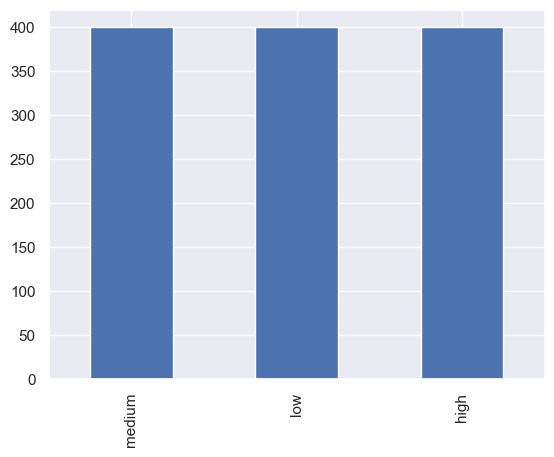

In [71]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [72]:
# fit the model
rfc.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = rfc.predict(X_train_new)

# prediction for Validation data
val_pred_sm = rfc.predict(X_val)

In [73]:
from sklearn.metrics import accuracy_score
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for validation Dataset = ', accuracy_score(val_pred_sm, y_val))

Accuracy score for Training Dataset =  1.0
Accuracy score for validation Dataset =  0.7916666666666666


In [74]:
print(classification_report(y_val, val_pred_sm ))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.82      0.78      0.80       157
      medium       0.79      0.81      0.80       176

    accuracy                           0.79       336
   macro avg       0.54      0.53      0.53       336
weighted avg       0.80      0.79      0.80       336



In [75]:
scores = cross_val_score(rfc, X_train, y_train, cv = 5, scoring='accuracy')

In [76]:
scores.mean()

0.7764331210191082

In [77]:
import pickle
# Save the model
model_filename = 'model.pkl'
with open(model_filename,'wb') as file:
    pickle.dump(rfc, file)
print('Model Saved Successfully')

Model Saved Successfully
